In [1]:
import pandas as pd
import numpy as np
import keras as kr
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.load('fp_meta.npy')
Y = np.load('ga_meta.npy')

In [3]:
X = np.array(X, dtype = np.float32)
st = StandardScaler()
X= st.fit_transform(X)

In [4]:
np.random.shuffle(Y)

In [5]:
#Y=np.random.rand(360)

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=42)
model = Sequential()
#输入层。传递给下一层的维度为50。 输入数据维度（input_dim）是1114。
model.add(Dense(units = 50, input_dim = X.shape[1]))
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))
#model.add(Activation("relu"))
#model.add(Activation("sigmoid"))
#输出层。 维度1，即输出单个值。
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                8400      
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 8,451
Trainable params: 8,451
Non-trainable params: 0
_________________________________________________________________


In [7]:
#SGD是随机梯度下降法。 nesterov是Nesterov的加速度梯度下降法。
model.compile(loss = 'mean_squared_error', optimizer = SGD(lr = 0.001, momentum = 0.9, nesterov = True),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 500, batch_size = 32,validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)
rms = (np.mean((y_test - y_pred) ** 2)) ** 0.5
#s = np.std(y_test - y_pred)
print("Neural Network RMS", rms)

Epoch 1/500
9/9 [==============================] - 2s 122ms/step - loss: 2.1646 - accuracy: 0.0000e+00 - val_loss: 0.1071 - val_accuracy: 0.0000e+00
Epoch 2/500
9/9 [==============================] - 0s 11ms/step - loss: 0.1347 - accuracy: 0.0000e+00 - val_loss: 0.2916 - val_accuracy: 0.0000e+00
Epoch 3/500
9/9 [==============================] - 0s 11ms/step - loss: 0.2387 - accuracy: 0.0000e+00 - val_loss: 0.0753 - val_accuracy: 0.0000e+00
Epoch 4/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0665 - accuracy: 0.0000e+00 - val_loss: 0.0396 - val_accuracy: 0.0000e+00
Epoch 5/500
9/9 [==============================] - 0s 10ms/step - loss: 0.0608 - accuracy: 0.0000e+00 - val_loss: 0.0322 - val_accuracy: 0.0000e+00
Epoch 6/500
9/9 [==============================] - 0s 10ms/step - loss: 0.0595 - accuracy: 0.0000e+00 - val_loss: 0.0325 - val_accuracy: 0.0000e+00
Epoch 7/500
9/9 [==============================] - 0s 10ms/step - loss: 0.0417 - accuracy: 0.0000e+00 - val_los

<Figure size 432x288 with 0 Axes>

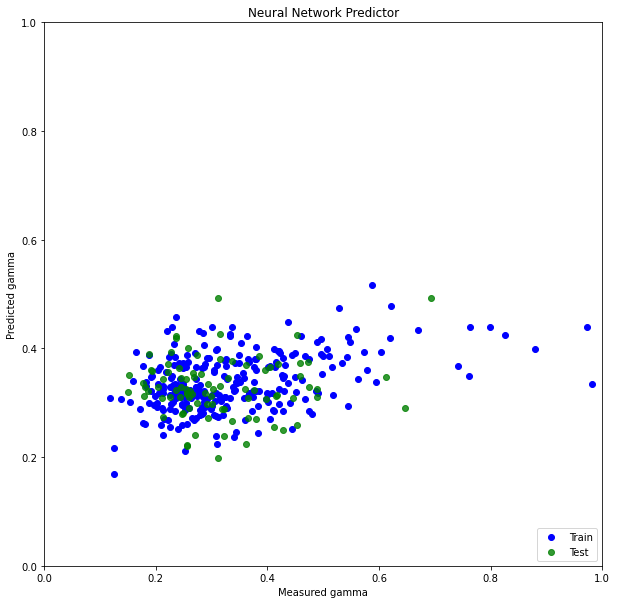

In [8]:
plt.figure()
plt.figure(figsize=(10,10))
plt.scatter(y_train, model.predict(X_train), label = 'Train', c = 'blue')
plt.title('Neural Network Predictor')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Measured gamma')
plt.ylabel('Predicted gamma')
plt.scatter(y_test, model.predict(X_test), c = 'green', label = 'Test', alpha = 0.8)
plt.legend(loc = 4)
plt.savefig('Neural Network Predictor_shuffle.png', dpi=500)
plt.show()